# Task 3. Algorithms for unconstrained nonlinear optimization. First- and second-order methods
### Sarafanov Michail, Big Data and Machine Learning, C4134

In [247]:
# Download all the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt 
import math
import timeit 
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
from scipy.optimize import newton
from scipy.optimize import minimize
from scipy.optimize import leastsq
import numdifftools as nd

Alpha - 0.6276188287888563
Beta - 0.3571049434028931


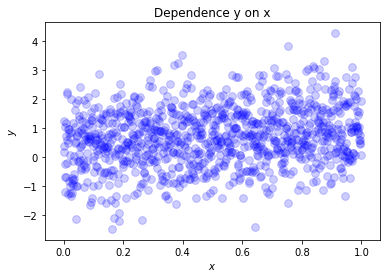

In [248]:
alpha = random.random() # Generate alpha in the range from 0 to 1
beta = random.random() # Generate beta in the range from 0 to 1
print('Alpha -', alpha)
print('Beta -', beta)
# Generate an array of noisy data in accordance with the task
y_list = []
x_list = []
for k in range(0,1000):
    x = k/1000
    q = random.normalvariate(0, 1)
    y = alpha*x + beta + q
    y_list.append(y)
    x_list.append(x)
x_list = np.array(x_list)
y_list = np.array(y_list)

# Draw a graph
plt.scatter(x_list, y_list, s = 60, color='blue', alpha = 0.2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Dependence y on x')
plt.show()

In [273]:
# Implement the function of the errors
def f1_error(w):
    a = w[0]
    b = w[1]
    return(sum(((a*x_list + b) - y_list) ** 2))

def f2_error(w):
    a = w[0]
    b = w[1]
    return(sum(((a/(1 + b*x_list)) - y_list) ** 2))

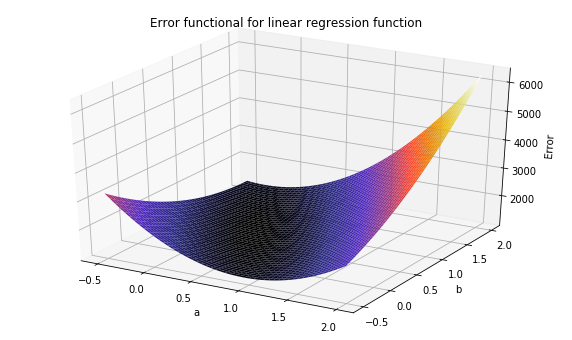

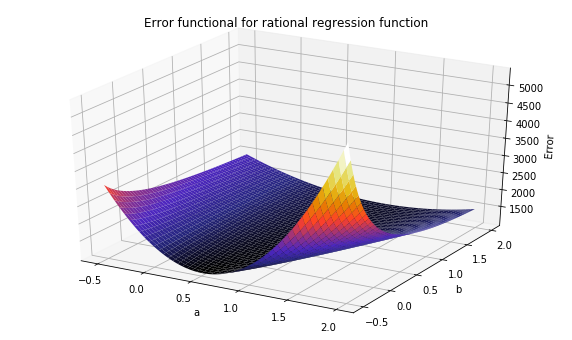

In [250]:
def plot3d_error_function1(function, title):   
    a = np.arange(-0.5, 2, 0.01)
    b = np.arange(-0.5, 2, 0.01)
    # Create a coordinate matrix
    A, B = np.meshgrid(a, b)
    # Create an empty matrix for Z
    Z = np.zeros((len(a), len(b)))
    # For each of the cells we will count the values of the error functional
    for i in range(len(a)):
        for j in range(len(b)):
            Z[i, j] = function([a[i], b[j]])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(A, B, Z, cmap = cm.CMRmap)
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('Error')
    plt.title(title)
    plt.show()

def plot3d_error_function2(function, title):   
    a = np.arange(-0.5, 2, 0.01)
    b = np.arange(-0.5, 2, 0.01)
    # Create a coordinate matrix
    A, B = np.meshgrid(a, b)
    # Create an empty matrix for Z
    Z = np.zeros((len(a), len(b)))
    # For each of the cells we will count the values of the error functional
    for i in range(len(a)):
        for j in range(len(b)):
            Z[i, j] = function([a[j], b[i]])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(A, B, Z, cmap = cm.CMRmap)
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('Error')
    plt.title(title)
    plt.show()
    
plot3d_error_function1(f1_error, 'Error functional for linear regression function')
plot3d_error_function2(f2_error, 'Error functional for rational regression function')

## Gradient Descent

In [256]:
def gradient_descent(function, x0, E, step = 0.0001):  
    grad = nd.Gradient(function)(x0) 
    x1 = x0 - step * grad 
    iteration = 1 
    grad_calculations = 1
    while True:
        if (abs(x1[0] - x0[0]) > E) or (abs(x1[1] - x0[1]) > E):
            x0 = x1 
            grad = nd.Gradient(function)(x0)
            x1 = x0 - step * grad 
            grad_calculations += 1 
            iteration += 1    
        else: 
            break
    a_opt = x1[0]
    b_opt = x1[1]
    return(a_opt, b_opt, iteration, grad_calculations)

In [257]:
# Set the initial parameters
x0 = [0.5, -0.5]

print('Linear regression function')
a_opt1_grad, b_opt1_grad, iteration_1, grad_calc_1 = gradient_descent(f1_error, x0, E = 0.001) 
print("Iterations - ", iteration_1) 
print("Gradient evaluations - ", grad_calc_1)
print('The optimal value of the coefficient a -', a_opt1_grad)
print('The optimal value of the coefficient b -', b_opt1_grad,'\n')

print('Rational regression function')
a_opt2_grad, b_opt2_grad, iteration_2, grad_calc_2 = gradient_descent(f2_error, x0, E = 0.001) 
print("Iterations - ", iteration_2) 
print("Gradient evaluations - ", grad_calc_2)
print('The optimal value of the coefficient a -', a_opt2_grad)
print('The optimal value of the coefficient b -', b_opt2_grad,'\n')

Linear regression function
Iterations -  61
Gradient evaluations -  61
The optimal value of the coefficient a - 0.8048597829174771
The optimal value of the coefficient b - 0.29284417179902433 

Rational regression function
Iterations -  35
Gradient evaluations -  35
The optimal value of the coefficient a - 0.47362285250082053
The optimal value of the coefficient b - -0.5767363550992404 



##  Conjugate Gradient Descent

In [258]:
# Find the minimum for a function of two variables using the Conjugate Gradient Descent method
# Set the initial parameters
x0 = [0.5, -0.5]

print('Linear regression function')
min_1 = minimize(f1_error, x0, method='CG', options={'disp': True})
a_opt1_CDS = min_1.x[0]
b_opt1_CDS = min_1.x[1]
print('The optimal value of the coefficient a -', a_opt1_CDS)
print('The optimal value of the coefficient b -', b_opt1_CDS,'\n')

print('Rational regression function')
min_2 = minimize(f2_error, x0, method='CG', options={'disp': True})
a_opt2_CDS = min_2.x[0]
b_opt2_CDS = min_2.x[1]
print('The optimal value of the coefficient a -', a_opt2_CDS)
print('The optimal value of the coefficient b -', b_opt2_CDS,'\n')

Linear regression function
         Current function value: 1008.544308
         Iterations: 4
         Function evaluations: 370
         Gradient evaluations: 90
The optimal value of the coefficient a - 0.7303636395319569
The optimal value of the coefficient b - 0.3326746421290365 

Rational regression function
         Current function value: 1012.594103
         Iterations: 11
         Function evaluations: 351
         Gradient evaluations: 85
The optimal value of the coefficient a - 0.46010594328864013
The optimal value of the coefficient b - -0.598637971500953 



## Newton’s method 

In [284]:
def newton_optimization(function, x0, E = 0.001):
    grad = nd.Gradient(function)(x0) 
    hess = nd.Hessian(function)(x0) 
    hess_inverted = np.linalg.inv(hess) 
    x1 = x0 - np.dot(hess_inverted, grad)
    iteration = 1

    while True:
        if (abs(x1[0] - x0[0]) > E) or (abs(x1[1] - x0[1]) > E): 
            x0 = x1 
            grad = nd.Gradient(function)(x0) 
            hess = nd.Hessian(function)(x0)
            hess_inverted = np.linalg.inv(hess) 
            x1 = x0 - np.dot(hess_inverted, grad) 
            iteration += 1
        else:
            break
    a_opt = x1[0]
    b_opt = x1[1]
    return(a_opt, b_opt, iteration)

In [285]:
# Set the initial parameters
x0 = [0.5, -0.5]

print('Linear regression function')
a_opt1_N, b_opt1_N, iteration_1 = newton_optimization(f1_error, x0) 
print("Iterations - ", iteration_1) 
print('The optimal value of the coefficient a -', a_opt1_N)
print('The optimal value of the coefficient b -', b_opt1_N,'\n')

print('Rational regression function')
a_opt2_N, b_opt2_N, iteration_2 = newton_optimization(f2_error, x0) 
print("Iterations - ", iteration_2) 
print('The optimal value of the coefficient a -', a_opt2_N)
print('The optimal value of the coefficient b -', b_opt2_N,'\n')

Linear regression function
Iterations -  2
The optimal value of the coefficient a - 0.7303635785630027
The optimal value of the coefficient b - 0.3326746417779874 

Rational regression function
Iterations -  5
The optimal value of the coefficient a - 0.46010595189156916
The optimal value of the coefficient b - -0.5986379574887493 



## Levenberg-Marquardt algorithm  

In [260]:
# Let's slightly change the error functionals
def f1_error(w, x, y):
    a = w[0]
    b = w[1]
    return((a*x + b) - y)

def f2_error(w, x, y):
    a = w[0]
    b = w[1]
    return((a/(1 + b*x)) - y)

# Set the initial parameters
x0 = [0.5,-0.5]

print('Linear regression function')
min_1, cov_x_1, dictionary_1, mesg_1, solution_1 = leastsq(f1_error, x0, args = (x_list,y_list), full_output = True)
print('The function evaluated at the output', len(dictionary_1.get('fvec')))
print('The number of function calls', dictionary_1.get('nfev'))
a_opt1_LMA = min_1[0]
b_opt1_LMA = min_1[1]
print('The optimal value of the coefficient a -', a_opt1_LMA)
print('The optimal value of the coefficient b -', b_opt1_LMA,'\n')

print('Rational regression function')
min_2, cov_x_2, dictionary_2, mesg_2, solution_2 = leastsq(f2_error, x0, args = (x_list,y_list), full_output = True)
print('The function evaluated at the output', len(dictionary_2.get('fvec')))
print('The number of function calls', dictionary_2.get('nfev'))
a_opt2_LMA = min_2[0]
b_opt2_LMA = min_2[1]
print('The optimal value of the coefficient a -', a_opt2_LMA)
print('The optimal value of the coefficient b -', b_opt2_LMA,'\n')

Linear regression function
The function evaluated at the output 1000
The number of function calls 10
The optimal value of the coefficient a - 0.7303635677807335
The optimal value of the coefficient b - 0.33267464827524107 

Rational regression function
The function evaluated at the output 1000
The number of function calls 16
The optimal value of the coefficient a - 0.4601011827212494
The optimal value of the coefficient b - -0.5986462920435761 



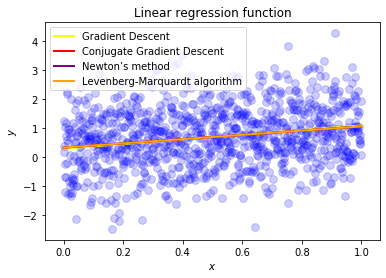

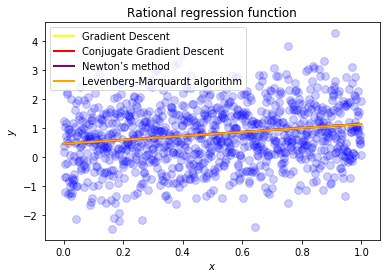

In [261]:
x = np.linspace(min(x_list), max(x_list), 2)
plt.scatter(x_list, y_list, s = 60, color='blue', alpha = 0.2)
plt.plot(x, a_opt1_grad*x + b_opt1_grad, c='yellow', linewidth = 2, label = 'Gradient Descent')
plt.plot(x, a_opt1_CDS*x + b_opt1_CDS, c='#FF0000', linewidth = 2, label = 'Conjugate Gradient Descent')
plt.plot(x, a_opt1_N*x + b_opt1_N, c='purple', linewidth = 2, label = 'Newton’s method')
plt.plot(x, a_opt1_LMA*x + b_opt1_LMA, c='orange', linewidth = 2, label = 'Levenberg-Marquardt algorithm')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Linear regression function')
plt.legend(loc = 'upper left')
plt.show()

plt.scatter(x_list, y_list, s = 60, color='blue', alpha = 0.2)
plt.plot(x, a_opt2_grad/(1 + b_opt2_grad*x), c='yellow', linewidth = 2, label = 'Gradient Descent')
plt.plot(x, a_opt2_CDS/(1 + b_opt2_CDS*x), c='#FF0000', linewidth = 2, label = 'Conjugate Gradient Descent')
plt.plot(x, a_opt2_N/(1 + b_opt2_N*x), c='purple', linewidth = 2, label = 'Newton’s method')
plt.plot(x, a_opt2_LMA/(1 + b_opt2_LMA*x), c='orange', linewidth = 2, label = 'Levenberg-Marquardt algorithm')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Rational regression function')
plt.legend(loc = 'upper left')
plt.show()

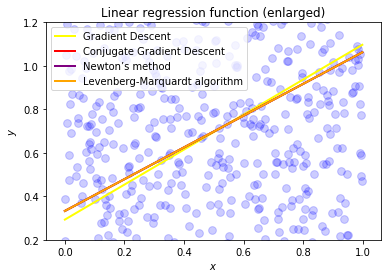

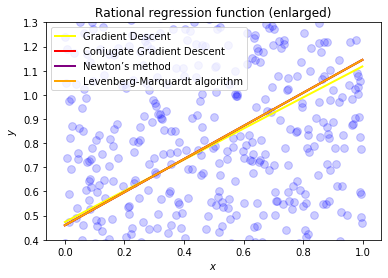

In [270]:
# Let's zoom in on part of the graph
x = np.linspace(min(x_list), max(x_list), 2)
plt.scatter(x_list, y_list, s = 60, color='blue', alpha = 0.2)
plt.plot(x, a_opt1_grad*x + b_opt1_grad, c='yellow', linewidth = 2, label = 'Gradient Descent')
plt.plot(x, a_opt1_CDS*x + b_opt1_CDS, c='#FF0000', linewidth = 2, label = 'Conjugate Gradient Descent')
plt.plot(x, a_opt1_N*x + b_opt1_N, c='purple', linewidth = 2, label = 'Newton’s method')
plt.plot(x, a_opt1_LMA*x + b_opt1_LMA, c='orange', linewidth = 2, label = 'Levenberg-Marquardt algorithm')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Linear regression function (enlarged)')
plt.legend(loc = 'upper left')
plt.ylim((0.2,1.2))
plt.show()

x = np.linspace(min(x_list), max(x_list), 2)
plt.scatter(x_list, y_list, s = 60, color='blue', alpha = 0.2)
plt.plot(x, a_opt2_grad/(1 + b_opt2_grad*x), c='yellow', linewidth = 2, label = 'Gradient Descent')
plt.plot(x, a_opt2_CDS/(1 + b_opt2_CDS*x), c='#FF0000', linewidth = 2, label = 'Conjugate Gradient Descent')
plt.plot(x, a_opt2_N/(1 + b_opt2_N*x), c='purple', linewidth = 2, label = 'Newton’s method')
plt.plot(x, a_opt2_LMA/(1 + b_opt2_LMA*x), c='orange', linewidth = 2, label = 'Levenberg-Marquardt algorithm')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Rational regression function (enlarged)')
plt.legend(loc = 'upper left')
plt.ylim((0.4,1.3))
plt.show()

As can be seen from the graphs, when using different optimization methods, the values of the coefficients did not much differ (lines are the same). It can be seen that all the presented algorithms really well find the minimum of the error functional. The results of the presented methods are almost the same.

The Newton's method turned out to be the fastest (in terms of convergence rate) of all algorithms: for a linear regression function, a minimum was found in 2 iterations, for a rational regression function, for 5. However, in order to use this method, the function must be convex and twice-differentiable, which is not fair for all functions.

The Levenberg-Marquardt algorithm turned out to be the second in terms of convergence: the minimum for the linear regression function was found in 10 iterations, for the rational regression function - for 16. It is not necessary to compose the Hessian for using this method, therefore this method is applicable for more functions. A similar result was shown by the conjugate gradient method (the minimum was found for 4 and 11 iterations, respectively). The conjugate gradient method calculated function values several hundred times (351 and 370).

Gradient Descent performed the task of finding the minimum of the function for 61 iterations for linear regression and for 35 for the rational regression function.